In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#  from google.colab import drive
#  drive.mount('/content/drive')

In [24]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Scratch Data/loan_train.csv")

In [25]:
 dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
dataset.shape

(614, 13)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Drop Unique Identifier

In [28]:
dataset1 = dataset.copy()

In [29]:
dataset = dataset.drop(["Loan_ID"],axis=1)

Check Null In data

In [30]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [31]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
dataset.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
dataset.Gender = dataset.Gender.fillna("Male")
dataset.Married = dataset.Married.fillna("Yes")
dataset.Dependents = dataset.Dependents.fillna("0")
dataset.Self_Employed = dataset.Self_Employed.fillna("No")
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.median())
dataset.Loan_Amount_Term = dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean())
dataset.Credit_History = dataset.Credit_History.fillna(dataset.Credit_History.median())

In [34]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Replace The Column level 

In [35]:
dataset.Loan_Status.replace({"N":0,"Y":1},inplace=True)

In [36]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.372489,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Label Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
dataset[dataset.select_dtypes(include=['object']).columns] = dataset[dataset.select_dtypes(include=['object']).columns].apply(le.fit_transform)
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Check Normal Distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

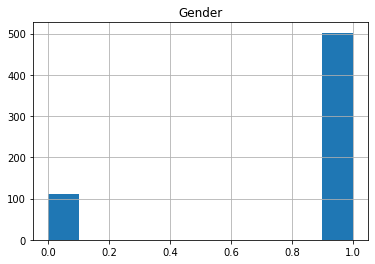

<Figure size 432x288 with 0 Axes>

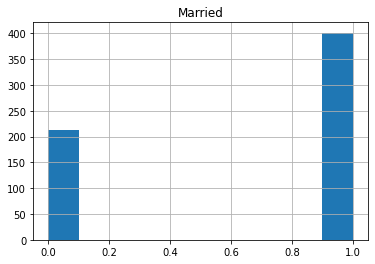

<Figure size 432x288 with 0 Axes>

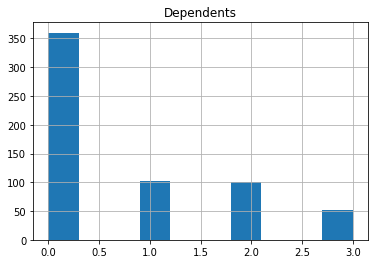

<Figure size 432x288 with 0 Axes>

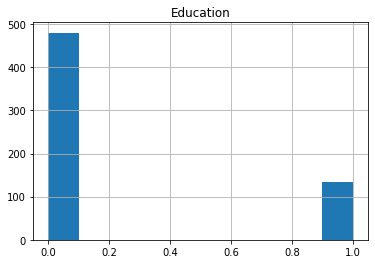

<Figure size 432x288 with 0 Axes>

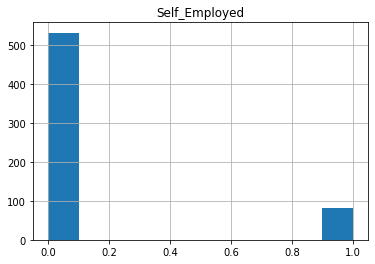

<Figure size 432x288 with 0 Axes>

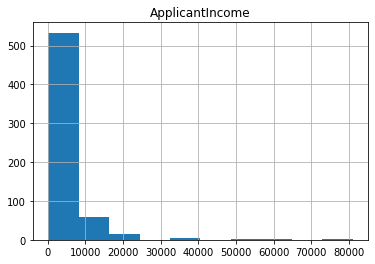

<Figure size 432x288 with 0 Axes>

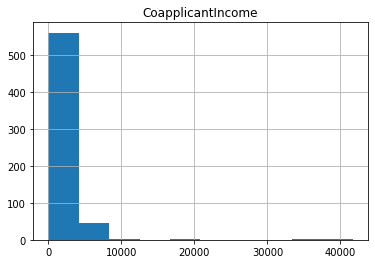

<Figure size 432x288 with 0 Axes>

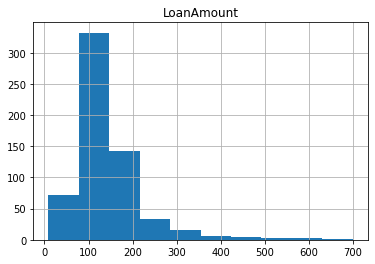

<Figure size 432x288 with 0 Axes>

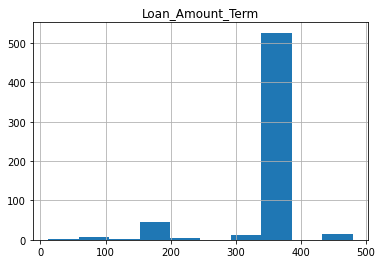

<Figure size 432x288 with 0 Axes>

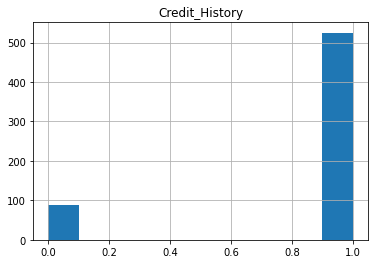

<Figure size 432x288 with 0 Axes>

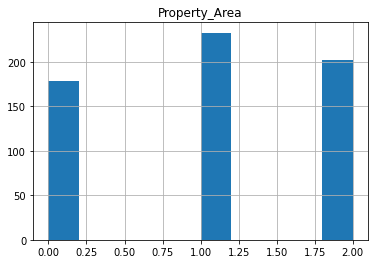

<Figure size 432x288 with 0 Axes>

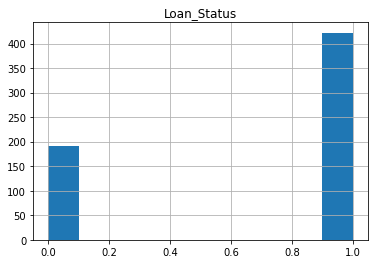

In [39]:
for i in dataset.columns:
    plt.figure()
    dataset.hist([i])

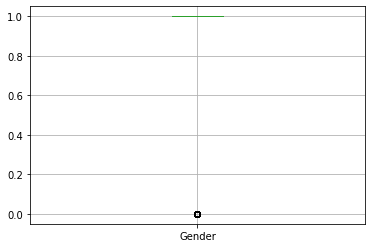

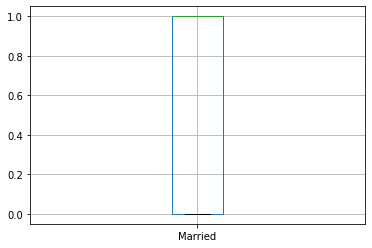

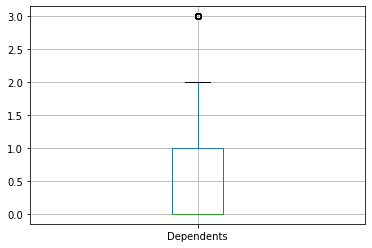

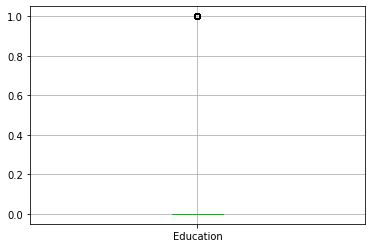

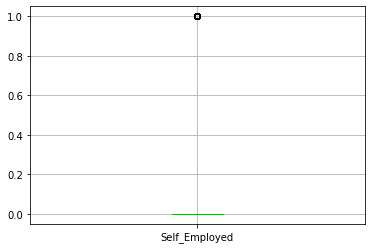

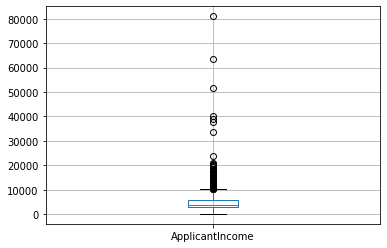

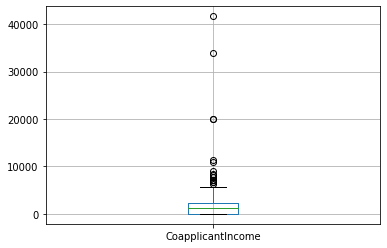

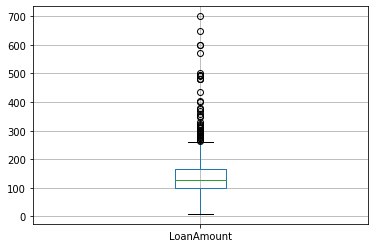

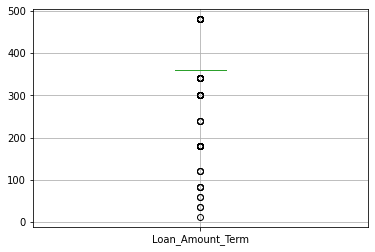

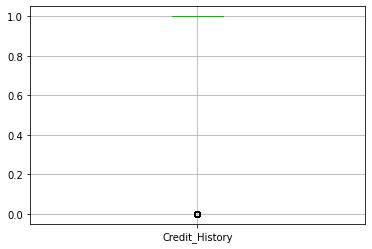

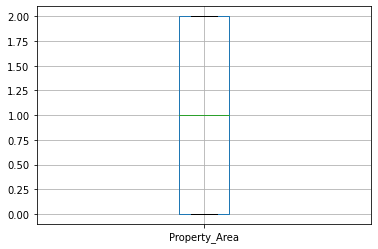

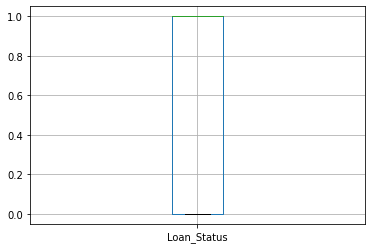

In [40]:
for i in dataset.columns:
    plt.figure()
    dataset.boxplot([i])

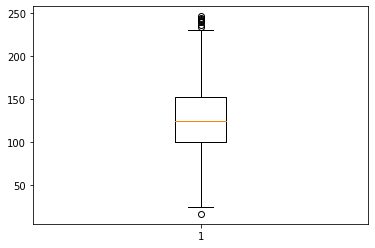

In [47]:
plt.boxplot(dataset["LoanAmount"])
plt.show()

In [42]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64


In [46]:
index = dataset[(dataset['LoanAmount'] >= 250) | (dataset['LoanAmount'] <=9)].index
dataset.drop(index, inplace=True) 
dataset['LoanAmount'].describe()

count    560.000000
mean     125.946429
std       42.603308
min       17.000000
25%      100.000000
50%      124.500000
75%      152.000000
max      246.000000
Name: LoanAmount, dtype: float64

In [51]:
index1 = dataset[(dataset['ApplicantIncome'] >= 20000)].index
dataset.drop(index1, inplace=True) 

dataset['ApplicantIncome'].describe()

count      557.000000
mean      4390.596050
std       2664.395462
min        150.000000
25%       2755.000000
50%       3652.000000
75%       5042.000000
max      18165.000000
Name: ApplicantIncome, dtype: float64

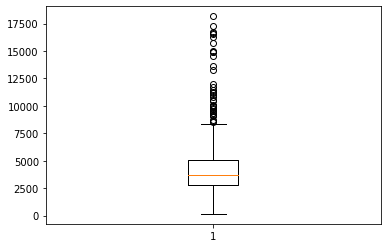

In [52]:
plt.boxplot(dataset["ApplicantIncome"])
plt.show()

In [57]:
index2 = dataset[(dataset['CoapplicantIncome'] >=6000)].index
dataset.drop(index2, inplace=True) 

dataset['CoapplicantIncome'].describe()

count     547.000000
mean     1277.665302
std      1397.354544
min         0.000000
25%         0.000000
50%      1131.000000
75%      2166.500000
max      5701.000000
Name: CoapplicantIncome, dtype: float64

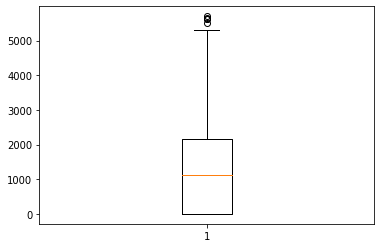

In [58]:
plt.boxplot(dataset["CoapplicantIncome"])
plt.show()

In [60]:
dataset.shape


(547, 12)

Create Baseline Model For understanding

In [61]:
X = dataset.drop(["Loan_Status"],axis=True)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [62]:
y = dataset.loc[: , "Loan_Status"]
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 547, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = .2,random_state = 40)

In [65]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [66]:
model = lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:

tab = confusion_matrix(pred,y_test)
print("Confusion Matrix:\n",tab)
# evaluate predictions
acc = (accuracy_score(y_test, pred))*100
print("\nAccuracy: %.2f%%\n" % acc)
print(classification_report(y_test,pred))

Confusion Matrix:
 [[18  1]
 [14 77]]

Accuracy: 86.36%

              precision    recall  f1-score   support

           0       0.95      0.56      0.71        32
           1       0.85      0.99      0.91        78

    accuracy                           0.86       110
   macro avg       0.90      0.77      0.81       110
weighted avg       0.88      0.86      0.85       110



In [70]:
corr_matrix=dataset.corr()
corr_matrix['Loan_Status']

Gender               0.027891
Married              0.106454
Dependents           0.009900
Education           -0.107876
Self_Employed       -0.024676
ApplicantIncome      0.019807
CoapplicantIncome    0.059865
LoanAmount          -0.036238
Loan_Amount_Term    -0.021202
Credit_History       0.575647
Property_Area        0.029641
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

##Deal With Skewness

In [71]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats}) 
skewness.head(12)



Skew in numerical features: 



,Skew
ApplicantIncome,2.275
Self_Employed,2.252
Education,1.198
Dependents,1.052
CoapplicantIncome,0.856
LoanAmount,0.259
Property_Area,-0.051
Married,-0.599
Loan_Status,-0.855
Gender,-1.595


In [196]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#dataset["CoapplicantIncome"] = np.log1p(dataset["CoapplicantIncome"])

In [197]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#dataset["ApplicantIncome"] = np.log1p(dataset["ApplicantIncome"])

Deal With Class Imblanced

In [73]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({0: 134, 1: 303})

In [74]:
os=RandomOverSampler(0.65)
X_train_ns_new,y_train_ns_new=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns_new)))

The number of classes before fit Counter({1: 303, 0: 134})
The number of classes after fit Counter({1: 303, 0: 196})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [107]:
# Logistic Regression with SMOTE

model2 = lg.fit(X_train_ns_new,y_train_ns_new)
print("Model has Fitted")

y_pred_smote_gb=model2.predict(X_test)
acc12 = (accuracy_score(y_test,y_pred_smote_gb))*100
print("\nAccuracy: %.2f%%\n" % acc12)
print(classification_report(y_pred_smote_gb, y_test))

Model has Fitted

Accuracy: 87.27%

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        22
           1       0.97      0.86      0.92        88

    accuracy                           0.87       110
   macro avg       0.80      0.89      0.83       110
weighted avg       0.90      0.87      0.88       110



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
## Model on Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [85]:
model3 = rfc.fit(X_train,y_train)
print("Model fitted successfully")

Model fitted successfully


In [87]:
pred_rf = model3.predict(X_test)

In [88]:
tab1 = confusion_matrix(pred_rf,y_test)

In [89]:
print("Confusion Matrix:\n",tab1)
# evaluate predictions
acc1 = (accuracy_score(y_test, pred_rf))*100
print("\nAccuracy: %.2f%%\n" % acc1)
print(classification_report(y_test,pred_rf))

Confusion Matrix:
 [[20  5]
 [12 73]]

Accuracy: 84.55%

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.86      0.94      0.90        78

    accuracy                           0.85       110
   macro avg       0.83      0.78      0.80       110
weighted avg       0.84      0.85      0.84       110



In [90]:
## model building on Random forest on oversampling
model4 = rfc.fit(X_train_ns_new,y_train_ns_new)

In [91]:
y_pred_smote_rf=model4.predict(X_test)
acc13 = (accuracy_score(y_test,y_pred_smote_rf))*100
print("\nAccuracy: %.2f%%\n" % acc13)
print(classification_report(y_pred_smote_rf, y_test))


Accuracy: 84.55%

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        23
           1       0.95      0.85      0.90        87

    accuracy                           0.85       110
   macro avg       0.77      0.84      0.79       110
weighted avg       0.87      0.85      0.85       110



In [108]:
testdata = pd.read_csv(r"/content/drive/MyDrive/Scratch Data/loan_test.csv")
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000,360.000,1.000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000,360.000,1.000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000,360.000,1.000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000,360.000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000,360.000,1.000,Urban


In [109]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [110]:
testdata.Gender = testdata.Gender.fillna("Male")
testdata.Dependents = testdata.Dependents.fillna("0")
testdata.Self_Employed = testdata.Self_Employed.fillna("No")
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.median())
testdata.Loan_Amount_Term = testdata.Loan_Amount_Term.fillna(testdata.Loan_Amount_Term.mean())
testdata.Credit_History = testdata.Credit_History.fillna(testdata.Credit_History.median())

In [111]:
testdata1 = testdata.copy()

In [112]:
testdata.shape

(367, 12)

In [113]:
testdata = testdata.drop(["Loan_ID"],axis=1)

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [115]:
testdata[testdata.select_dtypes(include=['object']).columns] = testdata[testdata.select_dtypes(include=['object']).columns].apply(le.fit_transform)
testdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.000,360.000,1.000,2
1,1,1,1,0,0,3076,1500,126.000,360.000,1.000,2
2,1,1,2,0,0,5000,1800,208.000,360.000,1.000,2
3,1,1,2,0,0,2340,2546,100.000,360.000,1.000,2
4,1,0,0,1,0,3276,0,78.000,360.000,1.000,2


In [116]:
#testdata.drop(['Dependents','Property_Area'],inplace=True,axis = 1)

In [128]:
pred = model4.predict(testdata)

In [129]:
pred = pd.DataFrame({"Loan_ID":testdata1.Loan_ID,"Loan_Status":pred})

In [130]:
pred.Loan_Status.replace({0:"N",1:"Y"},inplace =True)


In [131]:
print(pred)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           N
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           N
366  LP002989           Y

[367 rows x 2 columns]


In [132]:
pred.to_csv("/content/drive/MyDrive/Scratch Data/Loan04_file.csv",index = False)